## Import packages

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import pickle
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

## Read Data

In [2]:
df = pd.read_csv('Bank_CreditScoring.csv')
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8


## Check data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null   int64 
 12  Proper

### Check categorical data

In [4]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['Employment_Type', 'More_Than_One_Products', 'Property_Type', 'State', 'Decision']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**Employment_Type:** employer, Self_Employed, government, employee, Fresh_Graduate, 

**More_Than_One_Products:** yes, no, 

**Property_Type:** condominium, bungalow, terrace, flat, 

**State:** Johor, Selangor, Kuala Lumpur, Penang, P.Pinang, Pulau Penang, Johor B, K.L, N.Sembilan, N.S, Sarawak, Sabah, SWK, Trengganu, Kedah, 

**Decision:** Reject, Accept, 

From above exploration:

All the columns, i.e. "Employment_Type", "More_Than_One_Products", "Property_Type", "State" and "Decision" are Nominal data.


In [5]:
replacement_mapping_dict = {
    "Johor B": "Johor",
    "P.Pinang": "Penang",
    "Pulau Penang": "Penang",
    "K.L": "Kuala Lumpur",
    "N.Sembilan": "Negeri Sembilan",
    "N.S": "Negeri Sembilan",
    "SWK": "Sarawak",
    "Trengganu": "Terengganu"
}
df["State"].replace(replacement_mapping_dict, inplace=True)
df.State.unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Penang', 'Negeri Sembilan',
       'Sarawak', 'Sabah', 'Terengganu', 'Kedah'], dtype=object)

## Encoding

In [6]:
category_col =['Employment_Type', 'More_Than_One_Products', 'Property_Type', 'State', 'Decision']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'Employment_Type': {'Fresh_Graduate': 0, 'Self_Employed': 1, 'employee': 2, 'employer': 3, 'government': 4}, 'More_Than_One_Products': {'no': 0, 'yes': 1}, 'Property_Type': {'bungalow': 0, 'condominium': 1, 'flat': 2, 'terrace': 3}, 'State': {'Johor': 0, 'Kedah': 1, 'Kuala Lumpur': 2, 'Negeri Sembilan': 3, 'Penang': 4, 'Sabah': 5, 'Sarawak': 6, 'Selangor': 7, 'Terengganu': 8}, 'Decision': {'Accept': 0, 'Reject': 1}}


## Exploratory Data Analysis

In [7]:
df.describe()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.00000,2350.00000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000
mean,4.723404,1.702128,448350.120851,17.053191,0.500000,2.12766,3.12766,13.382979,3.744681,2.382979,...,1.991915,1.493617,10.659574,2.876596,2.020426,7972.040000,9.435756e+05,13767.859574,0.247234,7.496596
std,2.101127,1.367302,202814.886797,4.352123,0.500106,1.40874,1.40874,4.067090,1.391271,0.813707,...,0.816717,1.053568,1.077590,2.208214,0.818325,2588.330436,2.909033e+05,3591.707735,0.431496,1.112542
min,1.000000,0.000000,100194.000000,10.000000,0.000000,1.00000,2.00000,5.000000,2.000000,2.000000,...,1.000000,0.000000,10.000000,0.000000,1.000000,3583.000000,4.202390e+05,7523.000000,0.000000,6.000000
25%,3.000000,1.000000,273169.250000,13.000000,0.000000,1.00000,2.00000,10.000000,2.000000,2.000000,...,1.000000,1.000000,10.000000,2.000000,1.000000,5737.750000,7.007870e+05,10751.500000,0.000000,6.000000
50%,5.000000,2.000000,447251.500000,17.000000,0.500000,1.00000,2.00000,14.000000,4.000000,2.000000,...,2.000000,1.000000,10.000000,2.000000,2.000000,7982.500000,9.375275e+05,13689.500000,0.000000,8.000000
75%,7.000000,3.000000,623714.000000,21.000000,1.000000,3.00000,4.00000,17.000000,5.000000,2.000000,...,3.000000,2.000000,11.000000,4.000000,3.000000,10227.750000,1.197191e+06,16916.250000,0.000000,8.000000
max,7.000000,4.000000,799628.000000,24.000000,1.000000,5.00000,6.00000,19.000000,6.000000,5.000000,...,3.000000,3.000000,13.000000,8.000000,3.000000,12562.000000,1.449960e+06,19995.000000,1.000000,9.000000


Text(0.5, 1.0, 'Decision Accept VS Reject')

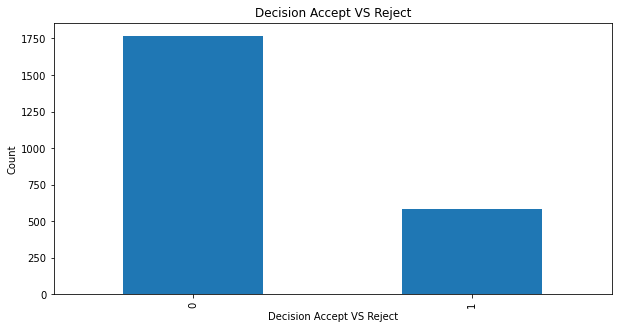

In [8]:
plt.figure(figsize=(10,5))
ax = df.Decision.value_counts().plot(kind = 'bar')
plt.xlabel("Decision Accept VS Reject")
plt.ylabel("Count")
plt.title("Decision Accept VS Reject")

In [9]:
#sns.pairplot(df)

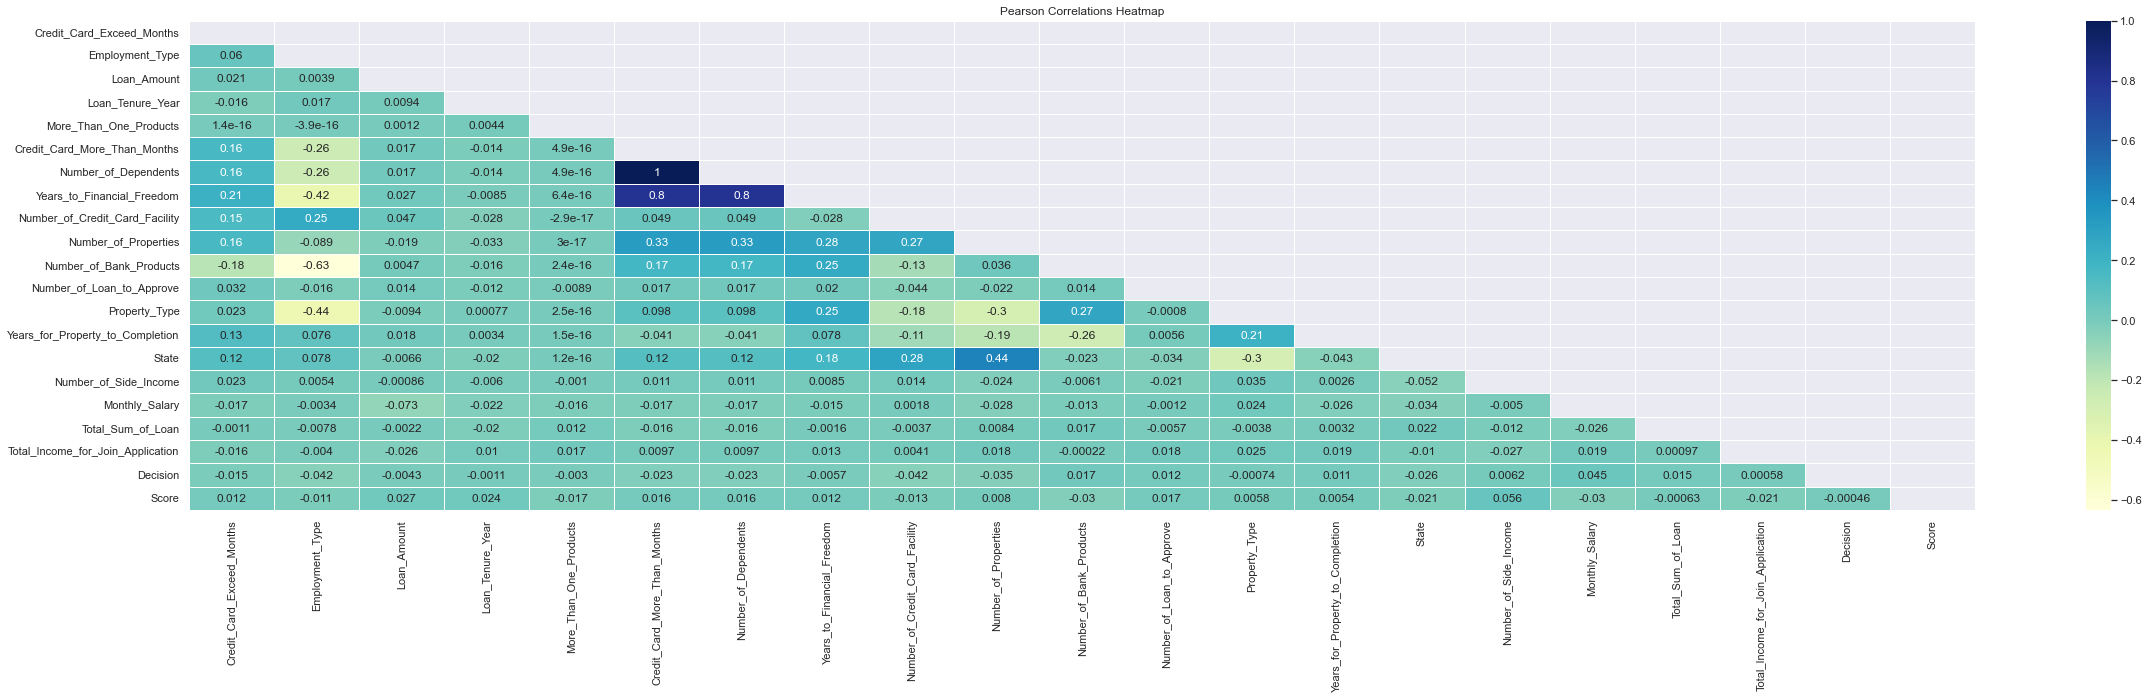

In [10]:
# Heatmap to find any high correlations
corr = df.corr()
sns.set(rc={'figure.figsize':(40,9)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=bool)))\
    .set_title("Pearson Correlations Heatmap");

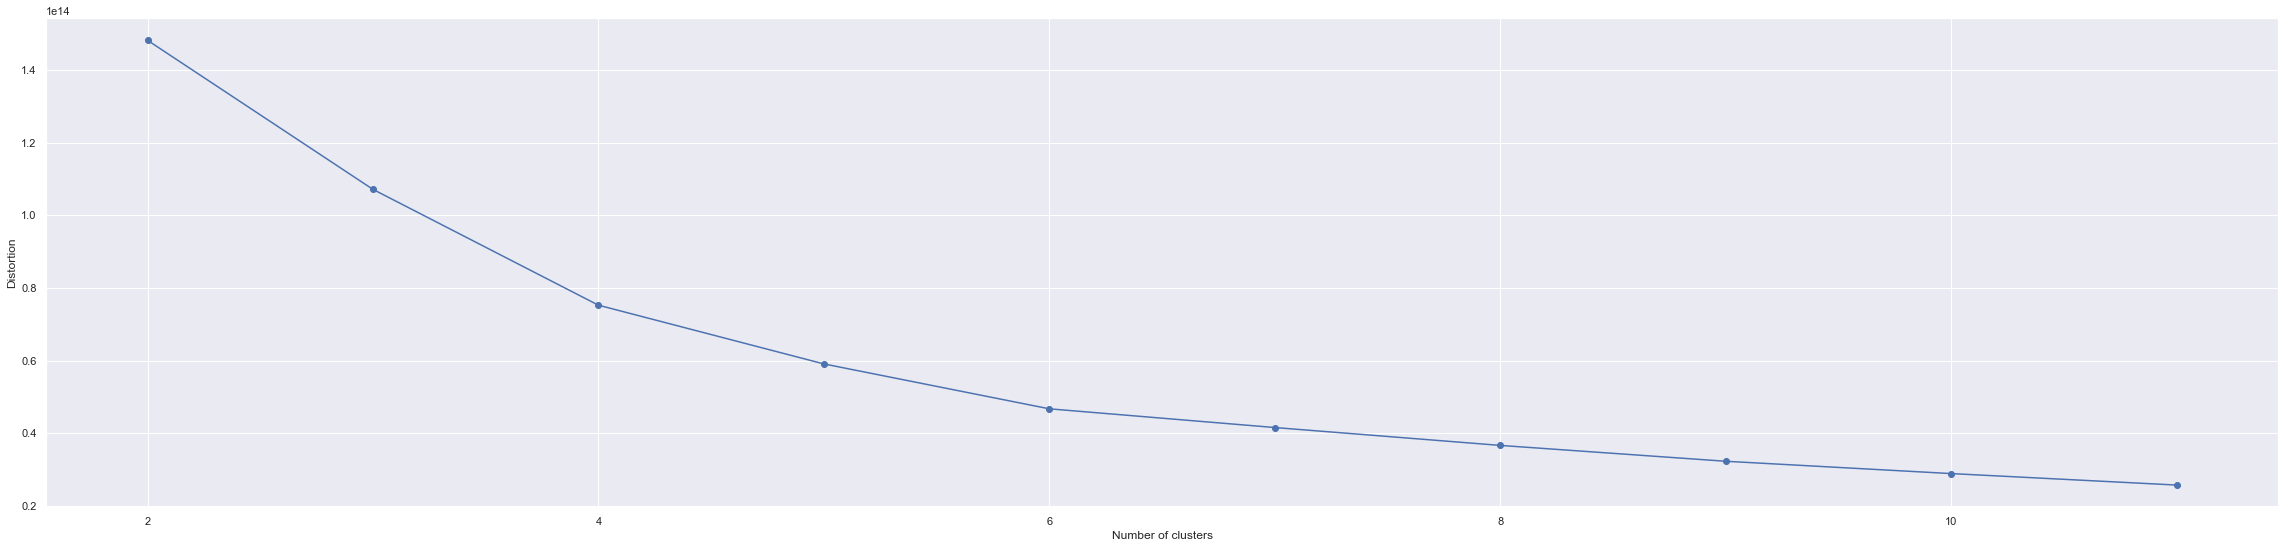

In [11]:
sse = []
for i in range(2,12):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=50, max_iter=500,
        random_state=0, algorithm='elkan'
    )
    km.fit(df)
    sse.append(km.inertia_)
    
plt.plot(range(2,12), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
# Identify the elbow for the number of clusters
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

4

In [13]:
silhouette_coefficients = []
for i in range(2, 12):
    km = KMeans(
    n_clusters=i, init='k-means++',
    n_init=50, max_iter=500,
    random_state=0, algorithm='elkan'
    )
    km.fit(df)
    score = silhouette_score(df, km.labels_)
    silhouette_coefficients.append(score)

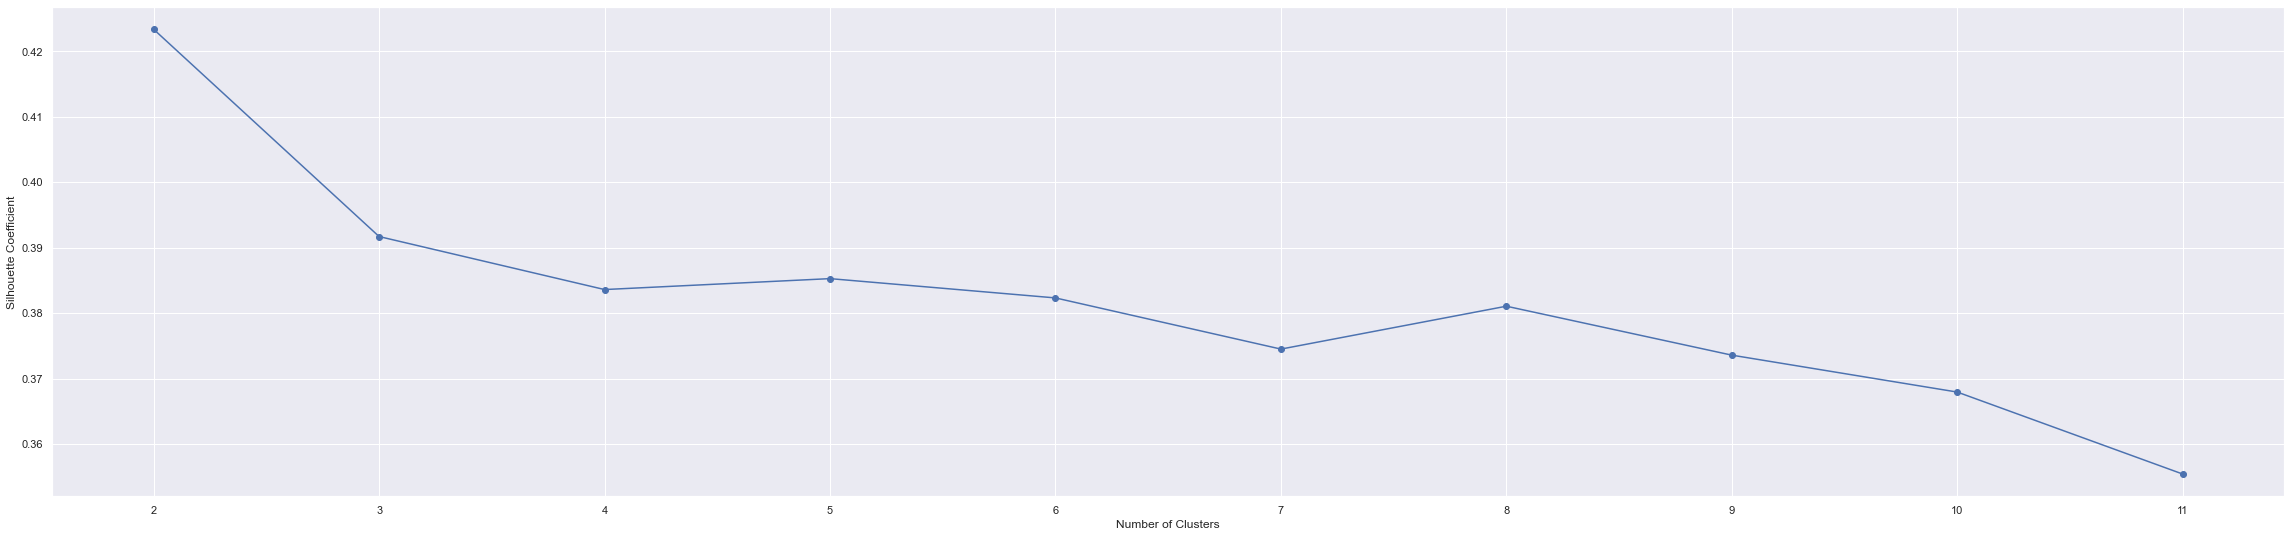

In [14]:
plt.plot(range(2, 12), silhouette_coefficients, marker='o')
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [15]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=50, max_iter=500,
    random_state=0, algorithm='elkan'
    )
clusters = km.fit_predict(df)

df_clustered = df.copy()
df_clustered["Cluster"] = clusters

In [16]:
#sns.pairplot(df_clustered, hue="Cluster")

## Split into train and test

In [17]:
df.Decision = df['Decision'].apply(str)
X = df.drop("Decision",axis=1)
y = df["Decision"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Train & Test Data using Random Forest

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, ypred))

Accuracy Score: 0.7510638297872341


## Train & Test Data using Ada Boost Classifier

In [19]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
ypred = kn.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, ypred))

Accuracy Score: 0.6936170212765957


## Train & Test Data using SVC

In [20]:
svm = SVC()
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, ypred))

Accuracy Score: 0.7553191489361702


## Train & Test Data using Decision Tree

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
ypred = dtc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, ypred))

Accuracy Score: 0.6574468085106383


## Train & Test Data using Gaussian Naive Bayes

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
ypred = gnb.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, ypred))

Accuracy Score: 0.7553191489361702


In [23]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
parameters = {'C':[0.1, 1], 'kernel':('linear', 'rbf')}
clf1 = GridSearchCV(svm, parameters, verbose=2, n_jobs=-1, cv=2)
clf1.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'kernel': ('linear', 'rbf')},
             verbose=2)

In [25]:
clf1.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [30]:
ypred = clf1.predict(X_test)
accuracy_score(y_test, ypred)

0.7553191489361702

C:\Users\LukeL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


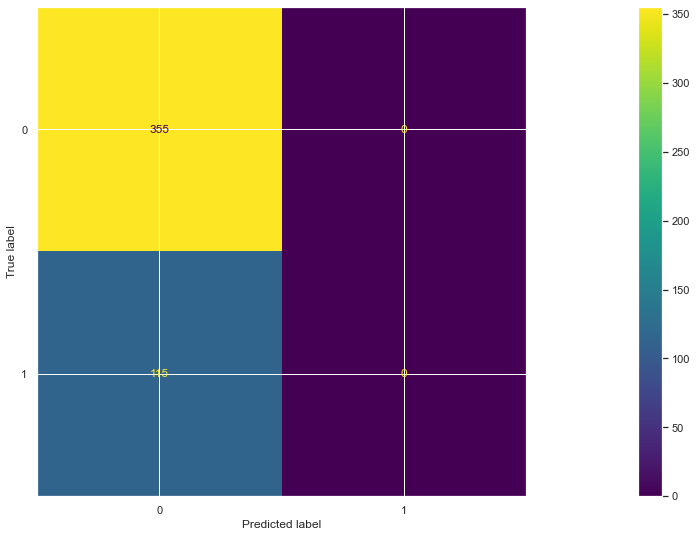

In [26]:
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

In [27]:
Classifications = {
    "K-Nearest":KNeighborsClassifier(),
    "SVC1": SVC(kernel='rbf'),
    "SVC3": SVC(kernel='linear'),
    "SVC4": SVC(kernel='sigmoid'),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "RandomForest2": RandomForestClassifier(criterion='entropy'),
    "GaussianNaiveBayes": GaussianNB(),
    "BernoulliNaiveBayes":BernoulliNB()
}

## Selection of classifiers
Among all the classifiers tested with default parameters, the models which return highest accuracy score are selected.

## Save Model

In [28]:
pickle_out = open("model.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()